In [28]:
import numpy as np
import pandas as pd

from why import CausalDiscoveryPC, BackdoorAdjustment, LinearRegressionATE

# Demo on using the "why" library
To estimate the causal effect between any two variables, the following three steps needed to be carried out:
* Causal Discovery to obtain a Structural Causal Model
* Obtain adjustment set for the two variables given the Structural Model from the first step
* Estimate the causal effect
* (Optionally) generate bounds and sensitivity analysis for the estimate

# Step 1: Causal Discovery
The PC algorithm is used to generate a Structural Causal Model

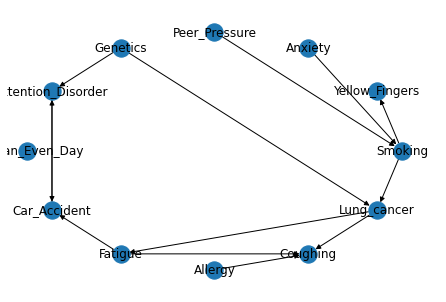

In [29]:
df = pd.read_csv("./data/lucas0_train.csv")

PC = CausalDiscoveryPC(df)

graph = PC.get_networkx_graph(draw=True)

# Step 1.5: Deduce any missing directions
In some cases, it is not possible to determine edge directions from only data. In that case, you must determine the direction of these edges yourself

In [30]:
graph.remove_edge("Car_Accident", "Attention_Disorder")

# Step 2: Backdoor adjustment
Backdoor adjustment is used to derive a minimal sufficient adjustment between any two variables

In [33]:
treatment = "Smoking"
outcome = "Lung_cancer"
adjustor = BackdoorAdjustment(graph)
adjustment_sets = adjustor.get_all_backdoor_adjustment_set(treatment, outcome)
# TODO: if no adjustment set is found -> No chains from treatment to outcomes
minimal_adjustment_set = list(adjustment_sets[0])

# Step 3: Estimation
Generate an estimate for the causal effect (ATE: Average Treatment Effect) between the two variables using the adjustment set and the data

In [34]:
estimator = LinearRegressionATE(df)
ate = estimator.estimate(treatment, outcome, minimal_adjustment_set)
ate

0.5104667941877244

# Step 4: Bounds and Sensitivity Analysis